#### 导入所用模块

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 读取电影的评分及星数分布数据

In [49]:
weighted_ratings = pd.read_table('weighted_ratings.txt', header=None)
weighted_ratings.rename(columns={0: 'Name', 1: 'IDs', 2: 'Year', 3: 'Ratings', 4: 'Ratings_Count', 
                      5: '5star', 6: '4star', 7: '3star', 8: '2star', 9: '1star'}, inplace=True)
del weighted_ratings[10]

print(len(weighted_ratings))
weighted_ratings.head()

1929


,Name,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star
0,高朋满座,2347277,1991,7.2,377,16.5,32.1,45.3,5.8,0.4
1,狂吻俄罗斯,1962939,1994,6.5,577,5.5,26.5,58.8,8.3,1.0
2,花田喜事,1416728,1993,7.5,34705,17.9,43.5,34.3,3.7,0.6
3,年年有今日,4191644,1994,7.8,281750,24.5,44.4,27.6,3.0,0.4
4,白日女鬼,2995142,1994,5.7,102,5.9,11.8,50.0,26.5,5.9


#### 读取电影的票房数据

In [5]:
boxings = pd.read_table('boxings.txt', header=None)
boxings.rename(columns={0: 'Name', 1: 'Boxing'}, inplace=True)

print(len(boxings))
boxings.head()

1930


,Name,Boxing
0,高朋满座,NaN
1,狂吻俄罗斯,NaN
2,花田喜事,NaN
3,年年有今日,NaN
4,白日女鬼,NaN


#### 读取电影的评分人数，看过人数，想看人数，短评数，影评数

In [6]:
movies_info = pd.read_table('movies_information.txt', header=None)
movies_info.rename(columns={0: 'Name', 1: 'IDs', 2: 'Ratings_Count', 3: 'Wish_Count', 
                           4: 'Collect_Count', 5: 'Year', 6: 'Comments_Count', 
                            7: 'Reviews_Count', 8: 'Genres'}, inplace=True)
print(len(movies_info))
movies_info.head()

1929


,Name,IDs,Ratings_Count,Wish_Count,Collect_Count,Year,Comments_Count,Reviews_Count,Genres
0,高朋满座,2347277,378.0,93.0,483.0,2006,60.0,0.0,剧情/
1,狂吻俄罗斯,1962939,580.0,239.0,834.0,1994,78.0,1.0,NaN
2,花田喜事,1416728,34936.0,2756.0,48342.0,1993,5181.0,19.0,喜剧/爱情/
3,年年有今日,4191644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,白日女鬼,2995142,104.0,91.0,126.0,1994,49.0,0.0,NaN


#### 整理、清洗数据，得到包含所有电影全部信息的大表

In [7]:
temp = pd.merge(movies_info, weighted_ratings, on='Name')
del temp['IDs_x']
del temp['Ratings_Count_x']
del temp['Year_x']
temp.rename(columns={'IDs_y': 'IDs', 'Year_y': 'Year', 'Ratings_Count_y': 'Ratings_Count'}, inplace=True)

print(len(temp))
temp.head()

1935


,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star
0,高朋满座,93.0,483.0,60.0,0.0,剧情/,2347277,1991,7.2,377,16.5,32.1,45.3,5.8,0.4
1,狂吻俄罗斯,239.0,834.0,78.0,1.0,NaN,1962939,1994,6.5,577,5.5,26.5,58.8,8.3,1.0
2,花田喜事,2756.0,48342.0,5181.0,19.0,喜剧/爱情/,1416728,1993,7.5,34705,17.9,43.5,34.3,3.7,0.6
3,年年有今日,NaN,NaN,NaN,NaN,NaN,4191644,1994,7.8,281750,24.5,44.4,27.6,3.0,0.4
4,白日女鬼,91.0,126.0,49.0,0.0,NaN,2995142,1994,5.7,102,5.9,11.8,50.0,26.5,5.9


temp.drop_duplicates('Name') 执行之后直接删除重复数据  temp.duplicated('Name') 将重复数据标记为True  
查看重复数据可执行temp[temp.duplicated('Name')==True]

In [8]:
temp.drop_duplicates('Name')

,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star
0,高朋满座,93.0,483.0,60.0,0.0,剧情/,2347277,1991,7.2,377,16.5,32.1,45.3,5.8,0.4
1,狂吻俄罗斯,239.0,834.0,78.0,1.0,NaN,1962939,1994,6.5,577,5.5,26.5,58.8,8.3,1.0
2,花田喜事,2756.0,48342.0,5181.0,19.0,喜剧/爱情/,1416728,1993,7.5,34705,17.9,43.5,34.3,3.7,0.6
3,年年有今日,NaN,NaN,NaN,NaN,NaN,4191644,1994,7.8,281750,24.5,44.4,27.6,3.0,0.4
4,白日女鬼,91.0,126.0,49.0,0.0,NaN,2995142,1994,5.7,102,5.9,11.8,50.0,26.5,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,刺杀盖世太保,4263.0,3665.0,1785.0,48.0,剧情/历史/战争/,26383923,2017,6.5,2578,11.9,27.0,49.6,10.1,1.3
1931,追捕,NaN,NaN,NaN,NaN,NaN,26348414,2017,5.8,1421,9.0,16.5,28.1,27.3,19.1
1932,嘉年华,48836.0,46230.0,22337.0,1517.0,剧情/,27019527,2017,8.2,3074,37.0,50.6,11.6,0.7,0.1
1933,维京：王者之战,NaN,NaN,NaN,NaN,NaN,26769449,2017,7.0,613,15.6,30.5,38.3,13.5,2.1


In [9]:
movies = pd.merge(temp, boxings, on='Name')

print(len(movies))
movies.head()

1947


,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star,Boxing
0,高朋满座,93.0,483.0,60.0,0.0,剧情/,2347277,1991,7.2,377,16.5,32.1,45.3,5.8,0.4,NaN
1,狂吻俄罗斯,239.0,834.0,78.0,1.0,NaN,1962939,1994,6.5,577,5.5,26.5,58.8,8.3,1.0,NaN
2,花田喜事,2756.0,48342.0,5181.0,19.0,喜剧/爱情/,1416728,1993,7.5,34705,17.9,43.5,34.3,3.7,0.6,NaN
3,年年有今日,NaN,NaN,NaN,NaN,NaN,4191644,1994,7.8,281750,24.5,44.4,27.6,3.0,0.4,NaN
4,白日女鬼,91.0,126.0,49.0,0.0,NaN,2995142,1994,5.7,102,5.9,11.8,50.0,26.5,5.9,NaN


In [10]:
movies.drop_duplicates('Name')

,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star,Boxing
0,高朋满座,93.0,483.0,60.0,0.0,剧情/,2347277,1991,7.2,377,16.5,32.1,45.3,5.8,0.4,NaN
1,狂吻俄罗斯,239.0,834.0,78.0,1.0,NaN,1962939,1994,6.5,577,5.5,26.5,58.8,8.3,1.0,NaN
2,花田喜事,2756.0,48342.0,5181.0,19.0,喜剧/爱情/,1416728,1993,7.5,34705,17.9,43.5,34.3,3.7,0.6,NaN
3,年年有今日,NaN,NaN,NaN,NaN,NaN,4191644,1994,7.8,281750,24.5,44.4,27.6,3.0,0.4,NaN
4,白日女鬼,91.0,126.0,49.0,0.0,NaN,2995142,1994,5.7,102,5.9,11.8,50.0,26.5,5.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,刺杀盖世太保,4263.0,3665.0,1785.0,48.0,剧情/历史/战争/,26383923,2017,6.5,2578,11.9,27.0,49.6,10.1,1.3,387.7万
1943,追捕,NaN,NaN,NaN,NaN,NaN,26348414,2017,5.8,1421,9.0,16.5,28.1,27.3,19.1,0.1万
1944,嘉年华,48836.0,46230.0,22337.0,1517.0,剧情/,27019527,2017,8.2,3074,37.0,50.6,11.6,0.7,0.1,NaN
1945,维京：王者之战,NaN,NaN,NaN,NaN,NaN,26769449,2017,7.0,613,15.6,30.5,38.3,13.5,2.1,1329.1万


#### 清洗数据，筛选出所有有票房记录的电影数据 movies_with_boxings = movies[~movies['Boxing'].isnull()]  其中的~为取反

也可以直接movies_with_boxings = movies[movies['Boxing'].notnull()]
eval将字符串str当成有效的表达式来求值并返回计算结果。
 字符串转换成列表
 4 >>>a = "[[1,2], [3,4], [5,6], [7,8], [9,0]]"
 5 >>>type(a)
 6 <type 'str'>
 7 >>> b = eval(a)
 8 >>> print b
 9 [[1, 2], [3, 4], [5, 6], [7, 8], [9, 0]]
10 >>> type(b)
11 <type 'list'>

字符串转换成字典
14 >>> a = "{1: 'a', 2: 'b'}"
15 >>> type(a)
16 <type 'str'>
17 >>> b = eval(a)
18 >>> print b
19 {1: 'a', 2: 'b'}
20 >>> type(b)
21 <type 'dict'>

x[:-1]取 '0.3万'从0到倒数第一个 取到的是0.3  之后用eval('0.3') 转化之后为0.3 float类型

In [11]:
movies_with_boxings = movies[~movies['Boxing'].isnull()]
movies_with_boxings['Boxing'] = movies_with_boxings['Boxing'].apply(lambda x: eval(x[:-1]))

print(len(movies_with_boxings))
movies_with_boxings.head()

1417


d:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star,Boxing
6,红番区,1740.0,62876.0,3496.0,17.0,喜剧/动作/犯罪/,1296011,1995,7.3,44300,11.4,44.2,41.4,2.7,0.3,0.3
14,没事偷着乐,2056.0,30869.0,2402.0,40.0,喜剧/,1300678,1999,7.5,21191,14.5,47.3,35.7,2.2,0.4,0.1
16,缘，妙不可言,249.0,13276.0,926.0,5.0,剧情/爱情/,2148618,1999,5.3,8833,1.4,7.1,53.4,30.5,7.7,1.2
19,宝莲灯,113.0,13726.0,2550.0,29.0,剧情/,2327493,1999,6.1,10913,10.1,18.8,43.8,19.4,8.0,2.3
27,国歌,NaN,NaN,NaN,NaN,NaN,1868115,1999,6.5,1082,7.8,22.4,59.9,7.4,2.5,6.5


#### 清洗数据，在拥有票房纪录的电影中再清洗出有详细统计数据的电影数据
处理 NA 的方法有四种：dropna , fillna , isnull , notnull。
对于一个 Series，dropna 返回一个仅含非空数据和索引值的 Series。
对 DataFrame 的处理方式dropna(axis=0, how='any', thresh=None) ，how 参数可选的值为 any 或者 all。all 仅在切片元素全为 NA 时才抛弃该行(列)。另外一个有趣的参数是 thresh，该参数的类型为整数，它的作用是，比如 thresh=3，会在一行中至少有 3 个非 NA 值时将其保留。

fillna(value=None, method=None, axis=0) 中的 value 参数除了基本类型外，还可以使用字典，这样可以实现对不同的列填充不同的值。method 的用法与前面 .reindex() 方法相同，method:{'backfill', 'bfill', 'pad', 'ffill', None} 参数用于指定插值（填充）方式

In [12]:
complete_data = movies_with_boxings.dropna()
complete_data

,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star,Boxing
6,红番区,1740.0,62876.0,3496.0,17.0,喜剧/动作/犯罪/,1296011,1995,7.3,44300,11.4,44.2,41.4,2.7,0.3,0.3
14,没事偷着乐,2056.0,30869.0,2402.0,40.0,喜剧/,1300678,1999,7.5,21191,14.5,47.3,35.7,2.2,0.4,0.1
16,缘，妙不可言,249.0,13276.0,926.0,5.0,剧情/爱情/,2148618,1999,5.3,8833,1.4,7.1,53.4,30.5,7.7,1.2
19,宝莲灯,113.0,13726.0,2550.0,29.0,剧情/,2327493,1999,6.1,10913,10.1,18.8,43.8,19.4,8.0,2.3
34,宇宙与人,249.0,1523.0,425.0,17.0,纪录片/,1464628,2000,8.3,1228,41.8,36.5,17.8,3.3,0.6,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,天生不对,2088.0,2103.0,1049.0,49.0,喜剧/爱情/,26696871,2017,4.9,925,5.1,8.1,33.0,30.5,23.4,2420.0
1937,恐袭波士顿,22349.0,32400.0,11228.0,242.0,剧情/历史/惊悚/,26357945,2017,8.1,26651,24.9,57.6,16.5,0.9,0.1,2092.6
1938,正义联盟,29352.0,110315.0,49485.0,1286.0,动作/科幻/奇幻/,2158490,2017,6.9,73390,11.4,30.5,46.1,10.2,1.7,66836.5
1941,寻梦环游记,56815.0,294646.0,132357.0,3608.0,喜剧/动画/冒险/,20495023,2017,9.2,1780,73.9,23.0,2.5,0.4,0.4,56892.6


#### 随机挑选出150部电影数据作为测试集，其余数据作为训练集
test_set_index = [False] * len(complete_data) 建立一个false的列表
之后将其中150个置为True

In [13]:
import random

test_set_index = [False] * len(complete_data)
selected_index = random.sample(list(range(len(complete_data))), 150)
for i in selected_index:
    test_set_index[i] = True

train_set_index = [False] * len(complete_data)
for i in range(len(train_set_index)):
    train_set_index[i] = not test_set_index[i]

In [14]:
test_set = complete_data[test_set_index]
train_set = complete_data[train_set_index]

In [15]:
print(len(test_set))
print(len(train_set))

150
756


#### 将影片类型映射成分数的函数
score[0,0,0,0,0,1,0   ...]21个  将电影类型转换成 k of 1类型

In [16]:
def type_score(s):
    assert type(s) == str
    types = s.split('/')
    if types[-1] == '':
        types.pop()
    score = [0] * 21
    for x in types:
        if x == '剧情':
            score[0] = 1
        elif x == '爱情':
            score[1] = 1
        elif x == '喜剧':
            score[2] = 1
        elif x == '动作':
            score[3] = 1
        elif x == '犯罪':
            score[4] = 1
        elif x == '科幻':
            score[5] = 1
        elif x == '惊悚':
            score[6] = 1
        elif x == '儿童':
            score[7] = 1
        elif x == '动画':
            score[8] = 1
        elif x == '悬疑':
            score[9] = 1
        elif x == '历史':
            score[10] = 1
        elif x == '战争':
            score[11] = 1
        elif x == '传记':
            score[12] = 1
        elif x == '纪录片':
            score[13] = 1
        elif x == '武侠':
            score[14] = 1
        elif x == '奇幻':
            score[15] = 1
        elif x == '冒险':
            score[16] = 1
        elif x == '运动':
            score[17] = 1
        elif x == '音乐':
            score[18] = 1
        elif x == '家庭':
            score[19] = 1
        elif x == '西部':
            score[20] = 1
    return score

#### 整理训练集数据  
train_set.head()
        Name  Wish_Count  Collect_Count  Comments_Count  Reviews_Count  \
14      没事偷着乐      2056.0        30869.0          2402.0           40.0
16     缘，妙不可言       249.0        13276.0           926.0            5.0
19        宝莲灯       113.0        13726.0          2550.0           29.0
因为train_set.iloc中的索引值已经改变 不在从1开始  相当于你不知道第一个索引是什么 所以不能用ix 或loc 只能用iloc
loc是根据dataframe的具体标签选取列，而iloc是根据标签所在的位置，从0开始计数。
df = df.loc[:, ['A', 'C']] 
df = df.iloc[:, [0, 2]]

item为Series类型

In [17]:
x_train, y_train = [], []

for i in range(len(train_set)):
    item = train_set.iloc[i]
    current_movie = []
    current_movie.append(item['Wish_Count'])
    current_movie.append(item['Collect_Count'])
    current_movie.append(item['Comments_Count'])
    current_movie.append(item['Reviews_Count'])
    current_movie.append(item['Year'])
    current_movie.append(item['Ratings'])
    current_movie.append(item['Ratings_Count'])
    current_movie.append(item['5star'])
    current_movie.append(item['4star'])
    current_movie.append(item['3star'])
    current_movie.append(item['2star'])
    current_movie.append(item['1star'])
    current_movie += type_score(item['Genres'])
    x_train.append(current_movie)
    y_train.append(item['Boxing'])
x_train[0]

[1740.0,
 62876.0,
 3496.0,
 17.0,
 1995,
 7.3,
 44300,
 11.4,
 44.2,
 41.4,
 2.7,
 0.3,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

#### 整理测试集数据

In [18]:
x_test, y_test = [], []

for i in range(len(test_set)):
    item = test_set.iloc[i]
    current_movie = []
    current_movie.append(item['Wish_Count'])
    current_movie.append(item['Collect_Count'])
    current_movie.append(item['Comments_Count'])
    current_movie.append(item['Reviews_Count'])
    current_movie.append(item['Year'])
    current_movie.append(item['Ratings'])
    current_movie.append(item['Ratings_Count'])
    current_movie.append(item['5star'])
    current_movie.append(item['4star'])
    current_movie.append(item['3star'])
    current_movie.append(item['2star'])
    current_movie.append(item['1star'])
    current_movie += type_score(item['Genres'])
    x_test.append(current_movie)
    y_test.append(item['Boxing'])

#### 调用各种回归方法的展示接口函数

In [19]:
def check_regression_model_outcome(model):
    model.fit(x_train, y_train)
    result = model.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test, 'b-', label='true value')
    plt.plot(np.arange(len(result)), result, 'r-', label='predict value')
    score = model.score(x_test, y_test)
    plt.title('score: %f' % score)
    plt.legend()
    plt.show()

#### 决策树回归

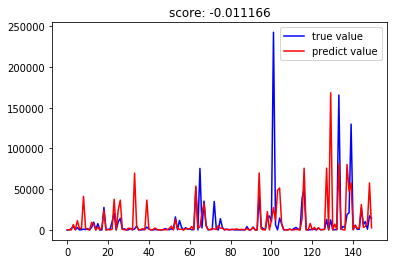

In [20]:
from sklearn import tree
decision_tree_regressor = tree.DecisionTreeRegressor()
check_regression_model_outcome(decision_tree_regressor)

#### 线性回归

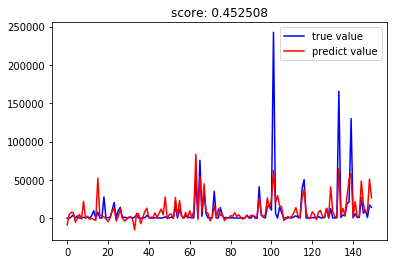

In [21]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
check_regression_model_outcome(linear_regression)

#### KNN回归

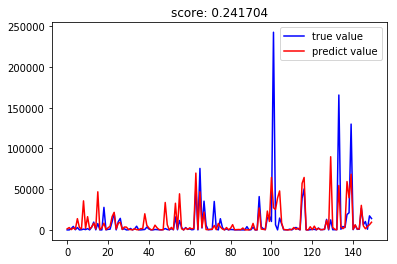

In [22]:
from sklearn import neighbors
k_neighbors_regressor = neighbors.KNeighborsRegressor()
check_regression_model_outcome(k_neighbors_regressor)

#### 随机森林回归

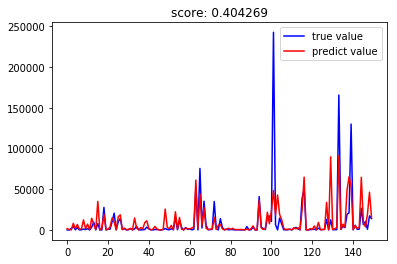

In [23]:
from sklearn import ensemble
random_forest_regressor = ensemble.RandomForestRegressor()
check_regression_model_outcome(random_forest_regressor)

#### Adaboost回归

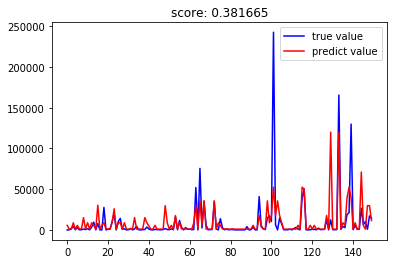

In [24]:
from sklearn import ensemble
AdaBoost_regressor = ensemble.AdaBoostRegressor(n_estimators=5)
check_regression_model_outcome(AdaBoost_regressor)

#### GBRT回归

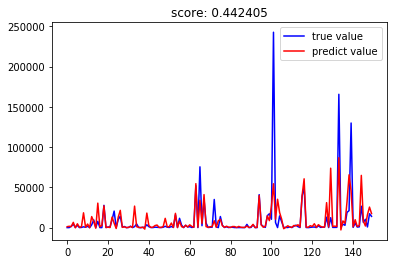

In [25]:
from sklearn import ensemble
GradientBoosting_regressor = ensemble.GradientBoostingRegressor()
check_regression_model_outcome(GradientBoosting_regressor)

#### Bagging回归

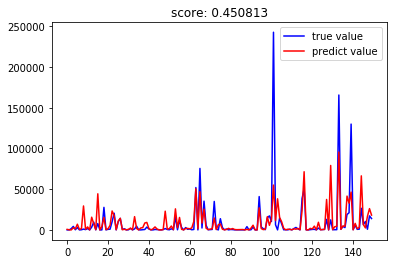

In [26]:
from sklearn.ensemble import BaggingRegressor
bagging_regressor = BaggingRegressor()
check_regression_model_outcome(bagging_regressor)

#### ExtraTree极端随机树回归

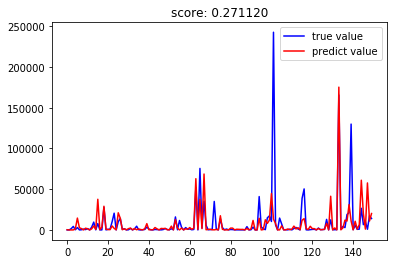

In [27]:
from sklearn.tree import ExtraTreeRegressor
extra_tree_regressor = ExtraTreeRegressor()
check_regression_model_outcome(extra_tree_regressor)

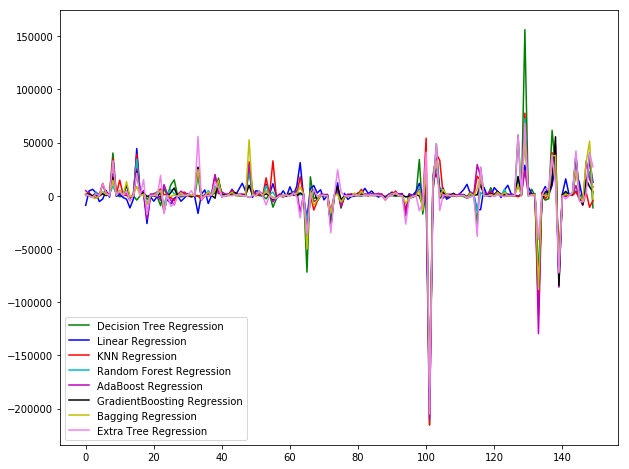

In [28]:
plt.figure(figsize=(10, 8))

decision_tree_regressor.fit(x_train, y_train)
result = decision_tree_regressor.predict(x_test)
plt.plot(np.arange(len(result)), (result - y_test), 'g-', label='Decision Tree Regression')

linear_regression.fit(x_train, y_train)
result = linear_regression.predict(x_test)
plt.plot(np.arange(len(result)), (result - y_test), 'b-', label='Linear Regression')

k_neighbors_regressor.fit(x_train, y_train)
result = k_neighbors_regressor.predict(x_test)
plt.plot(np.arange(len(result)), (result - y_test), 'r-', label='KNN Regression')

random_forest_regressor.fit(x_train, y_train)
result = random_forest_regressor.predict(x_test)
plt.plot(np.arange(len(result)), (result - y_test), 'c-', label='Random Forest Regression')

AdaBoost_regressor.fit(x_train, y_train)
result = AdaBoost_regressor.predict(x_test)
plt.plot(np.arange(len(result)), (result - y_test), 'm-', label='AdaBoost Regression')

GradientBoosting_regressor.fit(x_train, y_train)
result = GradientBoosting_regressor.predict(x_test)
plt.plot(np.arange(len(result)), (result - y_test), 'k-', label='GradientBoosting Regression')

bagging_regressor.fit(x_train, y_train)
result = bagging_regressor.predict(x_test)
plt.plot(np.arange(len(result)), (result - y_test), 'y-', label='Bagging Regression')

extra_tree_regressor.fit(x_train, y_train)
result = extra_tree_regressor.predict(x_test)
plt.plot(np.arange(len(result)), (result - y_test), color='violet', label='Extra Tree Regression')

plt.legend()
plt.show()

#### 从各归类方法的score值来看，决策树回归、随机森林回归、GBRT回归、Bagging回归有相对比较好的拟合结果。

#### 封装单部电影预测票房的函数

In [29]:
def single_movie_boxing(movie_name):
    single_movie = complete_data[complete_data['Name'] == movie_name]

    single_test_data = []

    item = single_movie.iloc[0]
    current_movie = []
    current_movie.append(item['Wish_Count'])
    current_movie.append(item['Collect_Count'])
    current_movie.append(item['Comments_Count'])
    current_movie.append(item['Reviews_Count'])
    current_movie.append(item['Year'])
    current_movie.append(item['Ratings'])
    current_movie.append(item['Ratings_Count'])
    current_movie.append(item['5star'])
    current_movie.append(item['4star'])
    current_movie.append(item['3star'])
    current_movie.append(item['2star'])
    current_movie.append(item['1star'])
    current_movie += type_score(item['Genres'])

    single_test_data.append(current_movie)
    
    result1 = decision_tree_regressor.predict(single_test_data)
    result2 = random_forest_regressor.predict(single_test_data)
    result3 = GradientBoosting_regressor.predict(single_test_data)
    result4 = bagging_regressor.predict(single_test_data)

    outcome = [result1, result2, result3, result4, item['Boxing']]
    
    plt.bar(np.arange(5), outcome)
    plt.xticks(np.arange(5), ['DecisionTree', 'RandomForest', 'GBRT', 'Bagging', 'Actual'],rotation='vertical')
    plt.show()

d:\python\lib\site-packages\numpy\lib\stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


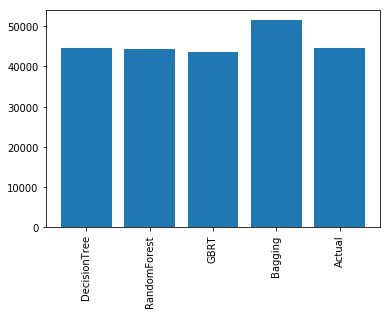

In [30]:
single_movie_boxing('谍影重重5')

In [31]:
complete_data[complete_data['Name'] == '谍影重重5']

,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star,Boxing
1652,谍影重重5,11153.0,130856.0,47676.0,610.0,动作/悬疑/惊悚/,26266072,2016,7.3,116566,15.1,42.0,36.5,5.1,1.3,44713.7


d:\python\lib\site-packages\numpy\lib\stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


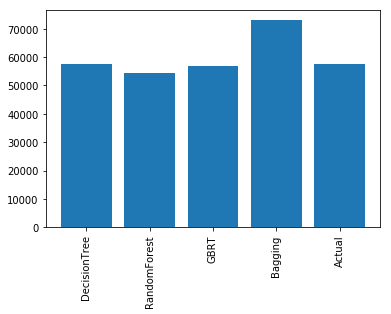

In [32]:
single_movie_boxing('你的名字。')

In [33]:
complete_data[complete_data['Name'] == '你的名字。']

,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star,Boxing
1720,你的名字。,103354.0,467649.0,184335.0,5245.0,剧情/爱情/动画/,26683290,2016,8.5,426575,44.1,37.7,16.0,1.7,0.5,57674.9


d:\python\lib\site-packages\numpy\lib\stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


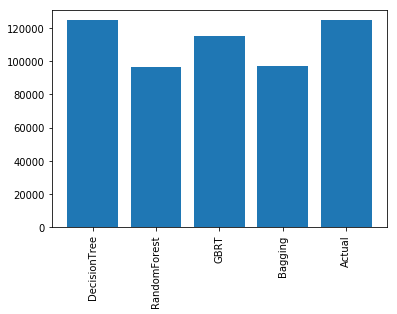

In [34]:
single_movie_boxing('美国队长3')

In [35]:
complete_data[complete_data['Name'] == '美国队长3']

,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star,Boxing
1592,美国队长3,14977.0,244284.0,87109.0,1728.0,动作/科幻/冒险/,25820460,2016,7.7,217644,23.3,43.2,28.3,4.0,1.3,124634.8


d:\python\lib\site-packages\numpy\lib\stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


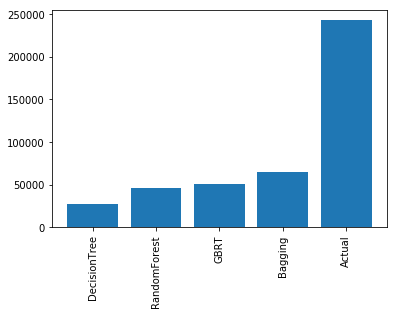

In [36]:
single_movie_boxing('速度与激情7')

In [37]:
complete_data[complete_data['Name'] == '速度与激情7']

,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star,Boxing
1399,速度与激情7,37862.0,298325.0,95813.0,1055.0,动作/犯罪/惊悚/,23761370,2015,8.3,258935,39.0,39.9,18.0,2.4,0.8,242658.6


d:\python\lib\site-packages\numpy\lib\stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


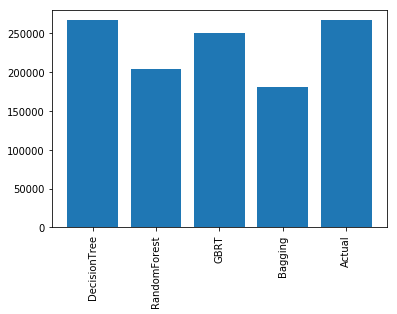

In [38]:
single_movie_boxing('速度与激情8')

In [39]:
complete_data[complete_data['Name'] == '速度与激情8']

,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star,Boxing
1825,速度与激情8,30625.0,203967.0,79851.0,1303.0,动作/犯罪/,26260853,2017,7.1,185009,13.7,36.6,40.1,7.8,1.7,267095.7


d:\python\lib\site-packages\numpy\lib\stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


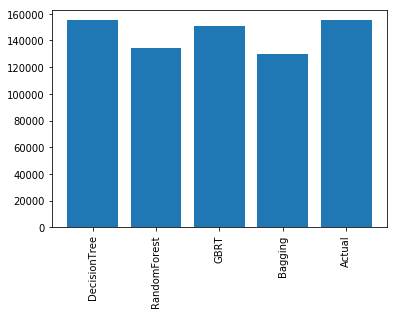

In [40]:
single_movie_boxing('变形金刚5：最后的骑士')

In [41]:
complete_data[complete_data['Name'] == '变形金刚5：最后的骑士']

,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,5star,4star,3star,2star,1star,Boxing
1871,变形金刚5：最后的骑士,27678.0,136296.0,66847.0,1427.0,动作/科幻/,25824686,2017,4.8,125030,3.3,8.2,34.5,35.0,19.0,155124.3


* **根据以上各个维度的数据对一部电影的票房的预测有一定的参考价值**
* **大IP的背书效应可能会造成实际票房远远超出预测值的情况出现**

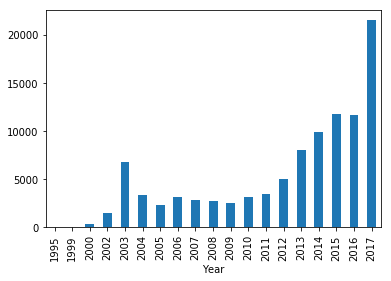

In [42]:
movies_with_boxings.groupby('Year').mean()['Boxing'].plot(kind='bar')

#### 2016年的电影的确表现不佳，按照本来的趋势，应该平均票房要远高于现在的值

In [43]:
def tag_in_genres(genres, tag):
    assert type(genres) == str
    assert type(tag) == str
    types = genres.split('/')
    if types[-1] == '':
        types.pop()
    if tag in types:
        return 1
    else:
        return 0

In [44]:
all_type = ['剧情', '爱情', '喜剧', '动作', '犯罪', '科幻', '惊悚', 
            '儿童', '动画', '悬疑', '历史', '战争', '传记', '纪录片', 
            '武侠', '奇幻', '冒险', '运动', '音乐', '家庭', '西部']

type_name = {'剧情': 'Feature', '爱情': 'Affectional', '喜剧': 'Comedy', '动作': 'Action', '犯罪': 'Crime', 
             '科幻': 'Science Fiction', '惊悚': 'Horror', '儿童': 'Juvenile', '动画': 'Animation', 
             '悬疑': 'Suspense', '历史': 'Historical', '战争': 'War', '传记': 'Biographical', '纪录片': 'Documentary', 
            '武侠': 'Swordsman', '奇幻': 'Fantasy', '冒险': 'Adventure', '运动': 'Sports', '音乐': 'Music', 
             '家庭': 'Family', '西部': 'Western'}

for genre in all_type:
    complete_data[type_name[genre]] = complete_data['Genres'].apply(tag_in_genres, args=(genre,))

d:\python\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [45]:
complete_data.head()

,Name,Wish_Count,Collect_Count,Comments_Count,Reviews_Count,Genres,IDs,Year,Ratings,Ratings_Count,...,War,Biographical,Documentary,Swordsman,Fantasy,Adventure,Sports,Music,Family,Western
6,红番区,1740.0,62876.0,3496.0,17.0,喜剧/动作/犯罪/,1296011,1995,7.3,44300,...,0,0,0,0,0,0,0,0,0,0
14,没事偷着乐,2056.0,30869.0,2402.0,40.0,喜剧/,1300678,1999,7.5,21191,...,0,0,0,0,0,0,0,0,0,0
16,缘，妙不可言,249.0,13276.0,926.0,5.0,剧情/爱情/,2148618,1999,5.3,8833,...,0,0,0,0,0,0,0,0,0,0
19,宝莲灯,113.0,13726.0,2550.0,29.0,剧情/,2327493,1999,6.1,10913,...,0,0,0,0,0,0,0,0,0,0
34,宇宙与人,249.0,1523.0,425.0,17.0,纪录片/,1464628,2000,8.3,1228,...,0,0,1,0,0,0,0,0,0,0


In [46]:
types = ['Feature', 'Affectional', 'Comedy', 'Action', 'Crime', 'Science Fiction', 
         'Horror', 'Juvenile', 'Animation', 'Suspense', 'Historical', 'War', 
         'Biographical', 'Documentary', 'Swordsman', 'Fantasy', 'Adventure', 
         'Sports', 'Music', 'Family', 'Western']

boxings = []
for item in types:
    movies = complete_data[complete_data[item] == 1]
    average_boxing = movies['Boxing'].mean()
    boxings.append(average_boxing)

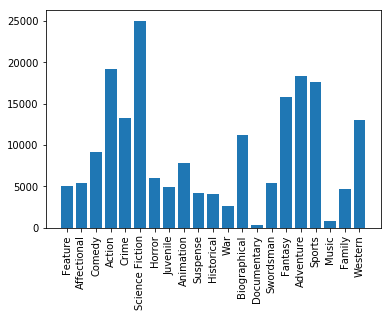

In [47]:
plt.figure()
plt.bar(np.arange(len(types)), boxings)
plt.xticks(np.arange(len(types)), types, rotation='vertical')
plt.show()

#### 从类型划分上来看，科幻片是平均票房最高的电影类型，其次是动作片
